In [6]:
from langgraph.graph import StateGraph , START ,END ,MessagesState
from langgraph.checkpoint.memory import InMemorySaver
from langchain_ollama import OllamaLLM
from langchain_core.messages.utils import trim_messages ,count_tokens_approximately
from typing import TypedDict
from langchain.messages import RemoveMessage


In [27]:
from langchain_community.chat_models import ChatOllama

llm = ChatOllama(
    model="phi3:mini",
    temperature=0
)


In [15]:
class MessagesState(TypedDict):
    messages:str

In [24]:
def chat(state: MessagesState):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

def delete_old_messages(state: MessagesState):
    msgs = state["messages"]

    # if more than 10 messages, delete the earliest 6
    if len(msgs) > 10:
        to_remove = msgs[:6]
        return {"messages": [RemoveMessage(id=m.id) for m in to_remove]}

    return {}


In [17]:
builder = StateGraph(MessagesState)
builder.add_node("chat", chat)
builder.add_node("cleanup", delete_old_messages)


In [18]:
builder.add_edge(START, "chat")
builder.add_edge("chat", "cleanup")   
builder.add_edge("cleanup", "__end__")

In [19]:
graph = builder.compile(checkpointer=InMemorySaver())

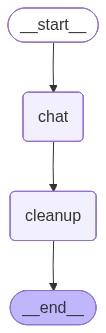

In [20]:
graph


In [21]:
config = {"configurable": {"thread_id": "t1"}}

In [25]:
# Run multiple turns
graph.invoke({"messages": [{"role": "user", "content": "Hi, I'm Nitish"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "Tell me about LangGraph"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "Now explain checkpointers"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Langchain"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Quantum Mechanics"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is Gen AI"}]}, config)
graph.invoke({"messages": [{"role": "user", "content": "What is my name"}]}, config)

NameError: name 'model' is not defined